In [3]:

from sklearn.model_selection import train_test_split
import tensorflow as tf
import src.python.yalefaces as yalefaces
import matplotlib.pyplot as plt

In [4]:
X, y = yalefaces.load("../datasets/yalefaces", flatten=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=24, stratify=y)

In [5]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(64, 12, activation="relu", padding="same", input_shape=[243, 320, 1]))
model.add(tf.keras.layers.MaxPooling2D(2))
model.add(tf.keras.layers.Conv2D(128, 3, activation="relu", padding="same"))
model.add(tf.keras.layers.Conv2D(128, 3, activation="relu", padding="same"))
model.add(tf.keras.layers.MaxPooling2D(2))
model.add(tf.keras.layers.Conv2D(256, 3, activation="relu", padding="same"))
model.add(tf.keras.layers.Conv2D(256, 3, activation="relu", padding="same"))
model.add(tf.keras.layers.MaxPooling2D(2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(15, activation="softmax"))
# x = layers.Conv2D(64,7, activation='relu', padding='same', input_shape=[243,320,1])
# x = layers.Dense(128, activation="relu")(x)
# x = layers.Dense(128, activation="relu")(x)
# outputs = layers.Dense(15, activation="softmax")(x)
# model = keras.Model(inputs, outputs)
# model.summary()
#
# # Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [6]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_test, y_test))

Epoch 1/30
5/5 [==============================] - 32s 6s/step - loss: 115.6350 - accuracy: 0.0541 - val_loss: 2.7031 - val_accuracy: 0.1176
Epoch 2/30
5/5 [==============================] - 33s 7s/step - loss: 2.7002 - accuracy: 0.0878 - val_loss: 2.6868 - val_accuracy: 0.1176
Epoch 3/30
5/5 [==============================] - 33s 7s/step - loss: 2.7144 - accuracy: 0.0878 - val_loss: 2.6778 - val_accuracy: 0.2941
Epoch 4/30
5/5 [==============================] - 35s 7s/step - loss: 2.6289 - accuracy: 0.2432 - val_loss: 2.6040 - val_accuracy: 0.2941
Epoch 5/30
5/5 [==============================] - 36s 7s/step - loss: 2.5022 - accuracy: 0.1959 - val_loss: 2.3812 - val_accuracy: 0.5882
Epoch 6/30
5/5 [==============================] - 36s 7s/step - loss: 2.3894 - accuracy: 0.2095 - val_loss: 1.7275 - val_accuracy: 0.5882
Epoch 7/30
5/5 [==============================] - 36s 7s/step - loss: 2.1729 - accuracy: 0.2973 - val_loss: 1.8571 - val_accuracy: 0.6471
Epoch 8/30
5/5 [================

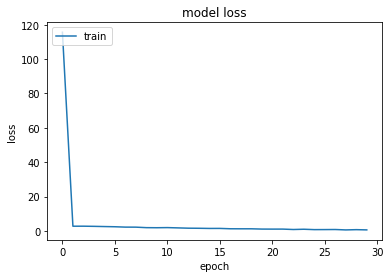

In [7]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

1/1 - 1s - loss: 0.1812 - accuracy: 1.0000 - 721ms/epoch - 721ms/step


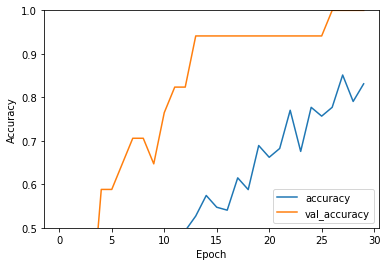

In [8]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

In [9]:
model.save('./cnn')

INFO:tensorflow:Assets written to: ./cnn\assets


INFO:tensorflow:Assets written to: ./cnn\assets
